<a href="https://colab.research.google.com/github/mannamoses02/Maternal-Health-Risk-Prediction/blob/main/Copy_of_manna's_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MATERNAL HEALTH RISK PREDICTION**

Data Set Information:
* Age: Age in years when a woman is pregnant.
* SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.</br>
* BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
* Body Temprature : Body Temperature of the women.
* HeartRate: A normal resting heart rate in beats per minute.
* Risk Level: Predicted Risk Intensity Level during pregnancy considering  the previous attribute.

## **PROBLEM IDENTIFICATION**

Many pregnant women die from complications of pregnancy because of not having enough information about maternal health care during pregnancy and post-pregnancy,so it is essential to monitor changes since the beginning which can help to reduce the preventable death of pregnant women and neonatal.

In this notebook, we will analyze several attributes that affect the health of pregnant women. We will also create a machine learning model to predict the level of health risk for pregnant women.

## **MOUNT GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **IMPORTING LIBRARIES AND DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Maternal Health Risk Data Set.xlsx')

## **EXPLORATORY DATA ANALYSIS**

Lets check our dataset information.

In [ ]:
data

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
#To display the first few rows of a dataframe.
data.head()

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
#To display last few rows of a dataframe.
data.tail()


,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
#To dislplay summary of dataframe that includes,columns ,datatypes,non-null count and memory usage for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ï»¿Age       1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


* We can see total 7 features, and each feature has 1014 observations,so the datatypes for the features are-

* categorical feature: Risk level
* Numerical Variable: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

In [ ]:
#To retrive the dimensions of the dataframe.
data.shape

(1014, 7)

In [ ]:
#To check null/Missing values
data.isnull().sum()

,0
ï»¿Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


Here,we see that there are no Null values present.

In [ ]:
#To check if we have Duplicate values present in our dataset
data.duplicated().sum()

562

There are 562 duplicates present which is quite a huge number for duplicates for this dataset,but in this case the patients might have the same value for health factors.

In [ ]:
#To provide staistical summary of dataframe such as count ,mean,min,max and more
data.describe()

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
#To count the number of distinct values present in each column
unique_value_counts = data.nunique()

unique_value_counts

,0
ï»¿Age,50
SystolicBP,19
DiastolicBP,16
BS,29
BodyTemp,8
HeartRate,16
RiskLevel,3


## **UNIVARIATE ANALYSIS**

Because we have to analyse how each attribute in the dataframe affects the health of pregnant women, we are going to use univariate analysis which will separately explore the distribution of each variable in dataset.

Methods to perform univariate analysis will depend on whether the variable is categorical or numerical.

* For numerical variable, we would explore its shape of distribution (distribution can either be symmetric or skewed) using histogram and density plots.
* For categorical variables, we would use bar plots to visualize the absolute and proportional frequency distribution.

# Categorical Variables

For categorical variables, we'll be just checking the frequency distribution of the data using bar plot.

1.RiskLevel

<ipython-input-14-b444225d27ed>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="RiskLevel", data=data,order=risk_order, palette=p_colors)


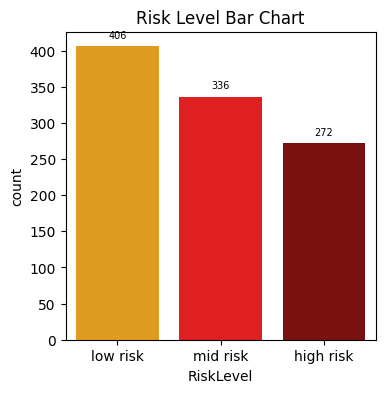

In [ ]:
#bar chart for categorical feature

#defineing custom colors for bar chart bars
p_colors = ['orange', 'red', 'darkred']
#order in which risk level should be displayed
risk_order = ["low risk", "mid risk", "high risk"]
#creating fig with specific size
plt.figure(figsize=(4, 4))
#setting title
plt.title('Risk Level Bar Chart')
#creating bar plot for risklevel column from dataset with the colors you want
count = sns.countplot(x="RiskLevel", data=data,order=risk_order, palette=p_colors)
#creating lables for each bar with height of bar
for bar in count.patches:
    count.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=7, xytext=(0, 8), textcoords='offset points')
#show the bar chart
plt.show()

Looks like most pregnant women in this dataset mostly has low health risk. Out of 1014 observations, 406 of pregnant women has low risk, 336 has mid risk, and 272 has high risk

# Numerical Variables

Numerical variables has a continuous value,therefore to understand the distribution of data on each variable, we'll use histogram instead of bar chart.

* A histogram is a chart that is similar to a bar chart, but it is used for interval and ratio level variables.
* Another thing is that Numerical data can consists of outliers,We'll use box plot to visualize continous data to find out whether there are outliers or not.

* Outliers are data points that significantly differ from the majority of the data in a dataset.

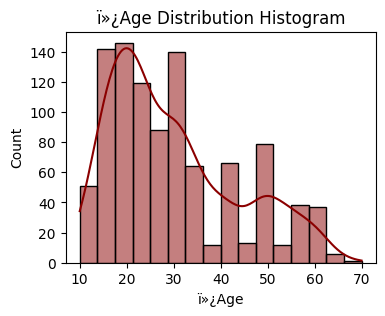

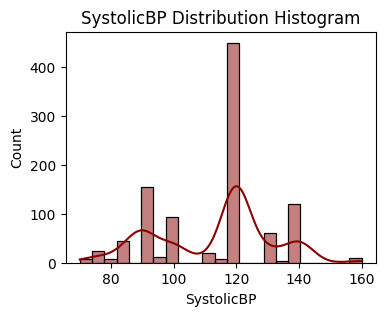

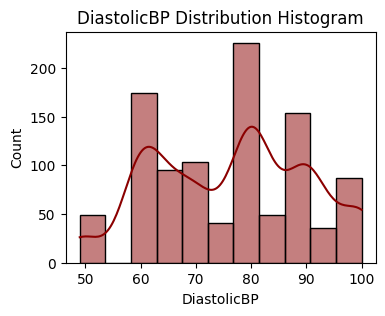

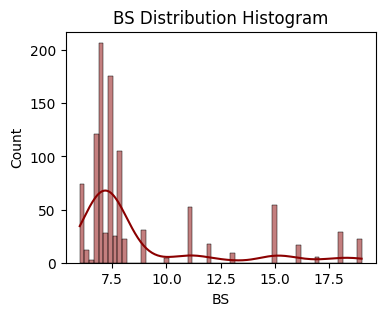

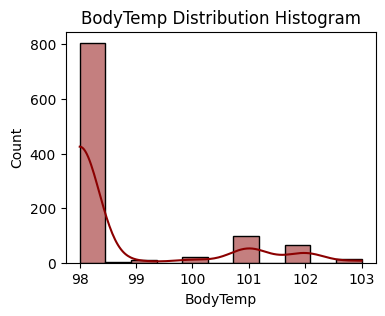

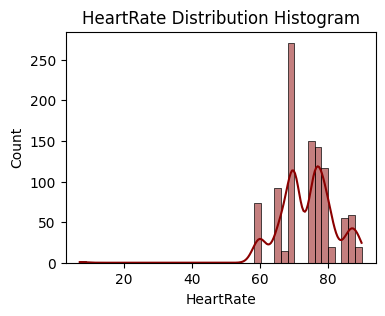

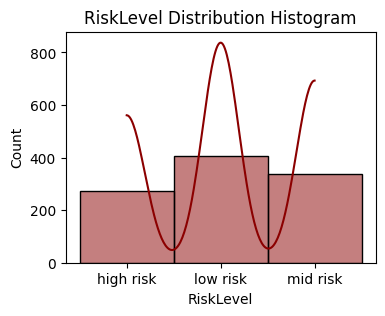

In [ ]:
#Histogram for numerical features

#iterate through each coloumn in dataset
for column in data.columns:
    #create new figure for each column
    plt.figure(figsize=(4,3))
    #create histogram plot
    sns.histplot(data=data[column], kde=True, color='darkred')
    #setting the title
    plt.title(f'{column} Distribution Histogram')
    #set x-axis label to column name
    plt.xlabel(column)
    #display the histogram
    plt.show()

* **Age Distribution Histogram:**

The x-axis represents age, ranging from 0 to 70.The y-axis represents the count of individuals in each age group.The histogram shows that the age distribution is skewed towards younger ages, with the highest counts in the 20-30 age range.There are fewer individuals in the older age groups (50+), and the distribution has a long tail towards the right.
* **SystolicBP Distribution Histogram:**

The histogram for systolic blood pressure (SystolicBP) appears to show the count of individuals within certain blood pressure ranges.The histogram has a single peak (mode), indicating the most common systolic blood pressure range among the population sampled.
* **DiastolicBP Distribution Histogram:**

The x-axis represents diastolic blood pressure (DiastolicBP), ranging from 40 to 100.The y-axis represents the count of individuals in each diastolic blood pressure range.The histogram shows a relatively uniform distribution with multiple peaks. The highest peaks are around the 60-70 and 90-100 ranges.The distribution curve indicates that there is variability in diastolic blood pressure among the population, with no single dominant range.
* **BS Distribution Histogram:**

The x-axis represents blood sugar (BS) levels.The y-axis represents the count of individuals in each blood sugar range.The histogram shows that the blood sugar distribution is negatively skewed, with a significant peak at a certain range, indicating a common blood sugar level among the population.
* **Body Temperature Distribution Histogram:**

The x-axis represents body temperature, ranging from 97 to 103 degrees Fahrenheit.The y-axis represents the count of individuals in each body temperature range.The histogram shows a very high peak at around 98 degrees, indicating that most individuals have a body temperature close to this value, which is within the normal range.The distribution has a long right tail, indicating that fewer individuals have higher body temperatures, which could suggest fever or other conditions.
* **Heart Rate Distribution Histogram:**

The x-axis represents heart rate.The y-axis represents the count of individuals in each heart rate range.The histogram is positively skewed where it shows a peak around a specific heart rate range, indicating the most common heart rate among the population.The distribution curve shows that the heart rate values are centered around this peak, with fewer individuals having significantly higher or lower heart rates.
* **Risk Level:**

The x-axis represents different risk levels (e.g., low, medium, high, or numerical risk scores).The y-axis represents the count or frequency of individuals or items in each risk level category. The population is has a varied risk profile.

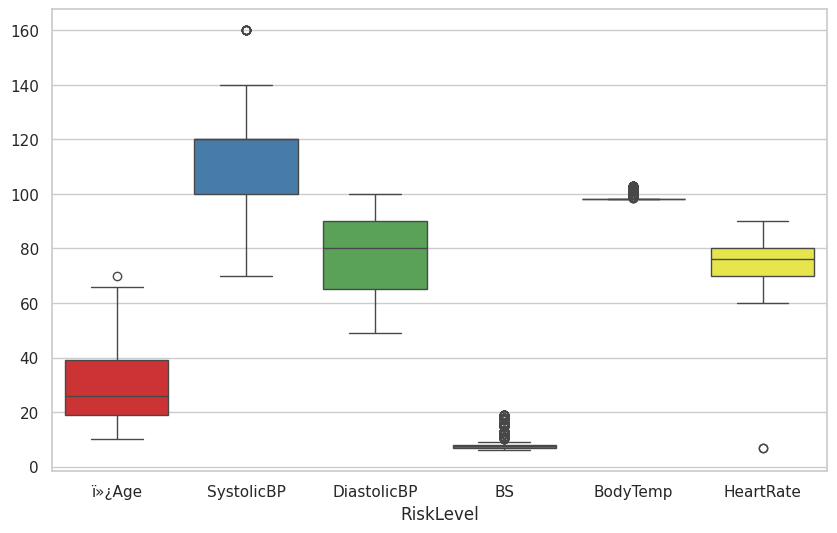

In [ ]:
#To dectect outliers we use box plot

#setting figsize
plt.figure(figsize=(10, 6))
#set style of plot
sns.set(style="whitegrid")
#create box plot for entire dataset with color
sns.boxplot(data=data, palette="Set1")  # Use your dataset and color palette
#set x-axis name
plt.xlabel(column)
plt.show()

* Observation:

Here we can see that almost all variables has outliers that can skew the distribution,but we can see that HeartRate has an outlier with a value too far from the other values.
Also, variable BS and BodyTemp seems to be dense,it could indicate that the data for these variables is highly concentrated within a narrow range. In some cases, this is perfectly normal but lets a look into these variables to be on a safer side.

<ipython-input-17-c135ff42d732>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['BS'], palette="Set1")
<ipython-input-17-c135ff42d732>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['BodyTemp'], palette="Set1")


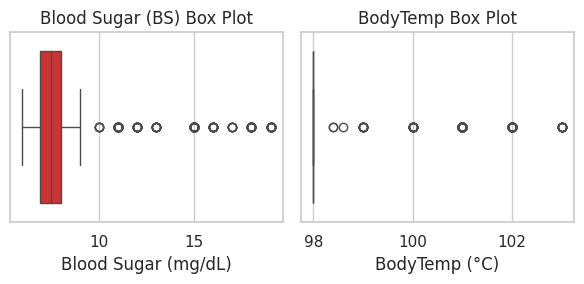

In [ ]:
#Creating box plots for BS and BodyTemp
#create fig with size
plt.figure(figsize=(6, 3))
#set style of plot
sns.set(style="whitegrid")
#create sublpot
plt.subplot(121)
#create box plot for BS
sns.boxplot(x=data['BS'], palette="Set1")
plt.title("Blood Sugar (BS) Box Plot")
plt.xlabel("Blood Sugar (mg/dL)")
#create box plot for BodyTemp
plt.subplot(122)
sns.boxplot(x=data['BodyTemp'], palette="Set1")
plt.title("BodyTemp Box Plot")
plt.xlabel("BodyTemp (°C)")
#adjust layout of plots
plt.tight_layout()
plt.show()

In summary, a narrow range in blood sugar and body temperature values is not necessarily a cause for concern.

## **BIVARIATE ANALYSIS**

Bivariate analysis lets you study the relationship that exists between two variables. It helps to find out if there is an association between the variables and if yes then what is the strength of association. One variable here is dependent while the other is independent. We can use correlation coefficients to find out how high is the relationship between two variables. We can also use scatter plot to show the patterns that can be formed using the two variables.

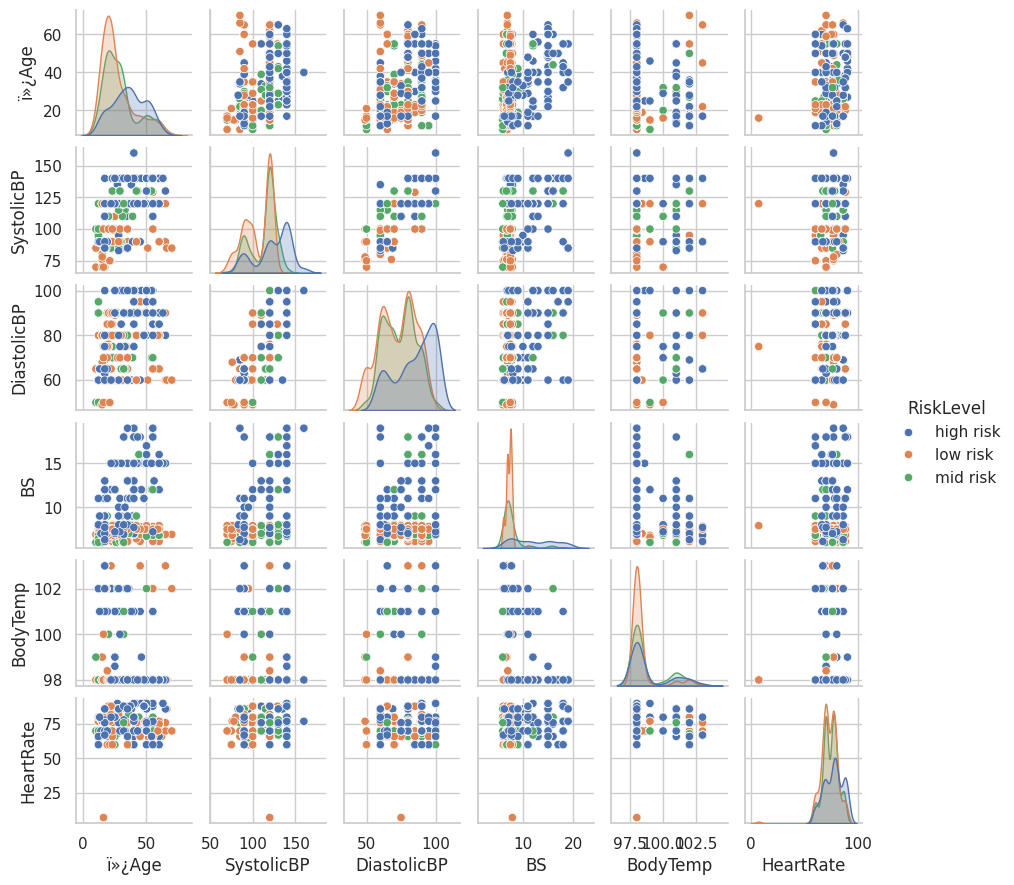

In [ ]:
#Pairplot visualization with risklevel as hue
sns.pairplot(data,height=1.5 ,hue='RiskLevel')

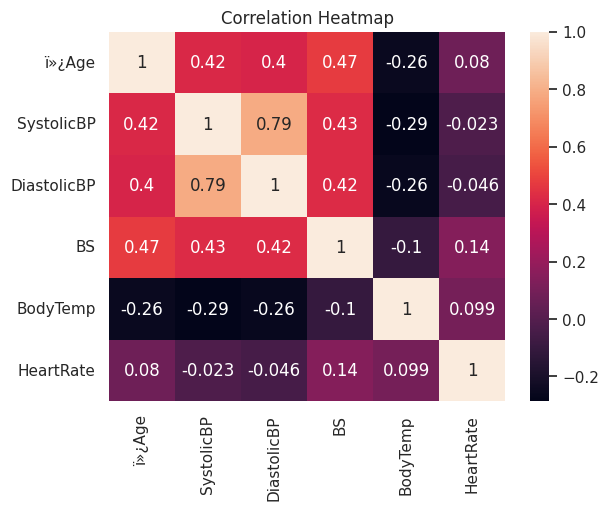

In [ ]:
#To determine correlation between features
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()


Observation:

SystolicBP and DiastolicBP are highly correlated. As we can see from the graph, they have positive correlation with correlation coefficient value = 0.79.This means that SystolicBP and DiastolicBP variable contains highly similar information and there is very little or no variance in information.
so it is not an issue to remove the similiar feature as they seem to be highly correlated.

* Relation Between predicted and Target variables

To determine the distribution of predictor variables on the target variable we will use histogram with hue mapping for visualization.



1.  SystolicBP → RiskLevel

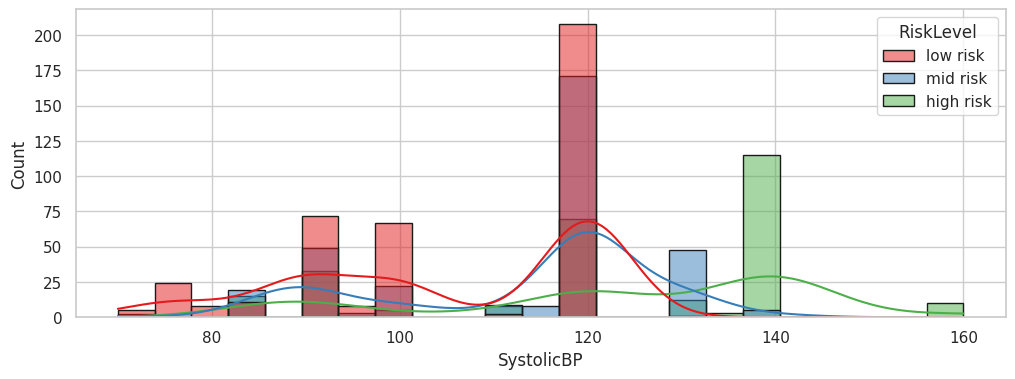

In [ ]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()


NOTE:

Healthy adult typically has a systolic blood pressure within the range of 90 to 120 mm Hg

Observation:

1.Pregnant women with upper value of blood pressure >= 120 mmHg mostly has low health risk.

2.The higher pregnant women's blood pressure, the higher the health risk

 2. DiastolicBP → RiskLevel

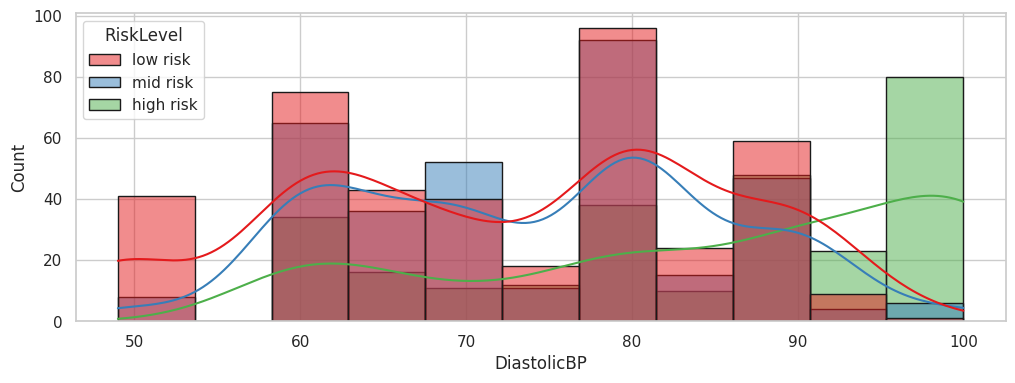

In [ ]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

NOTE:

The normal diastolic blood pressure (DBP) in a healthy adult is typically in the range of 60 to 80 mm Hg.


Observation:

1.pregnant women with distolic value of >=90 mm Hg has low risk while the blood pressure increases risk increases.

2.This variable has pretty similar pattern as SystolicBP. This is not surprising since they're highly correlated.

 3. BS → RiskLevel

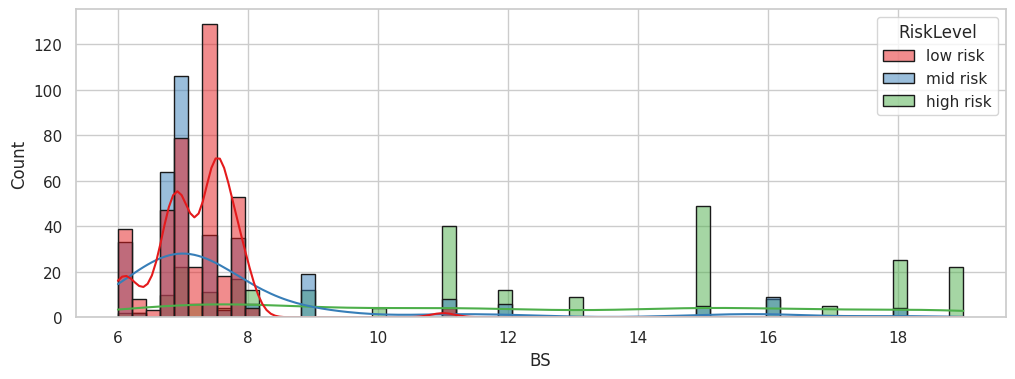

In [ ]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

NOTE:

A healthy human should have blood glucose level less than 6-7
Observation:

1.Almost every pregnant women with blood glucose level >= 8 has high health risk but otherwise, they seems to have lower health risk with blood glucose < 8

 5. BodyTemp → RiskLevel

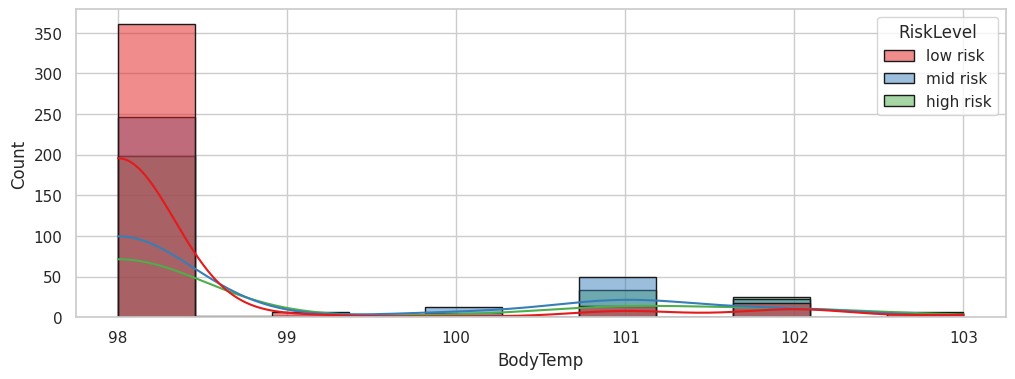

In [ ]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot
plt.show()

NOTE:

The normal body temperature in a healthy human typically falls within a range around 98.6 degrees Fahrenheit.

Observation:

1.Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature.

2.Pregnant women with body temperature >= 100 mostly has higher health risk

6. HeartRate → RiskLevel

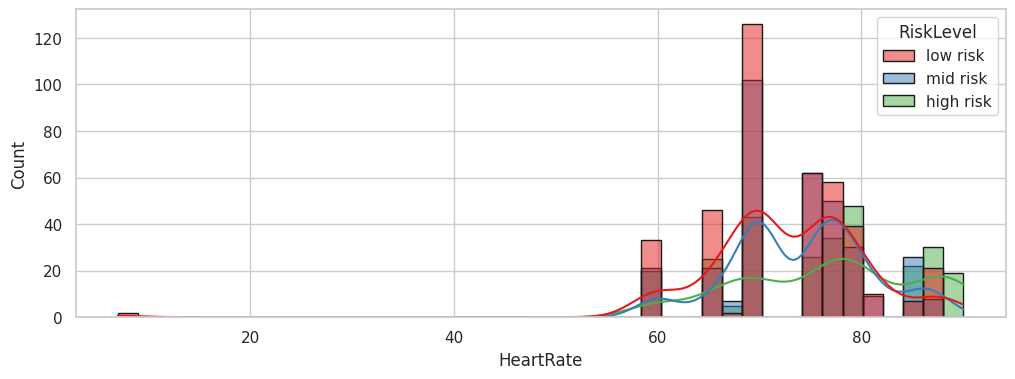

In [ ]:
# Set the background color of the figure to white
plt.figure(figsize=(12,4), facecolor='white')
# Create the histogram plot with black borders
sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette='Set1', edgecolor='k')
# Show the plot

plt.show()

NOTE:

A normal resting heart rate for adults ranges from 60 to 100 beats per minute.

Observation:

1.As i mentioned before, HeartRate variable has outlier that with a value that looks unnatural, which is 6 bpm.

2.Health risks increases with heart rate >90 bpm has high risk.

## **FEATURE ENGINEERING AND DATA CLEANING**

In [ ]:
#To convert categorical data, which consists of text or string values, into numerical values.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'RiskLevel' column in-place
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])

* Many machine learning algorithms and statistical models require input data to be in numerical form. Categorical data cannot be directly used with these models, so it needs to be transformed into numbers.

## **OUTLIER HANDLING**

The only variable that has an outlier with an unreasonable value is HeartRate. In this variable, there are two observations that have a heart rate value of 7 bpm (beats per minute). A normal resting heart rate for adults ranges from 60 to 100 beats per minute, and the lowest recorded resting heart rate in human history was 25 bpm. Therefore, we will drop this 2 records that has a heart rate value of 7 because that value doesn't make any sense, and most likely is an input error.

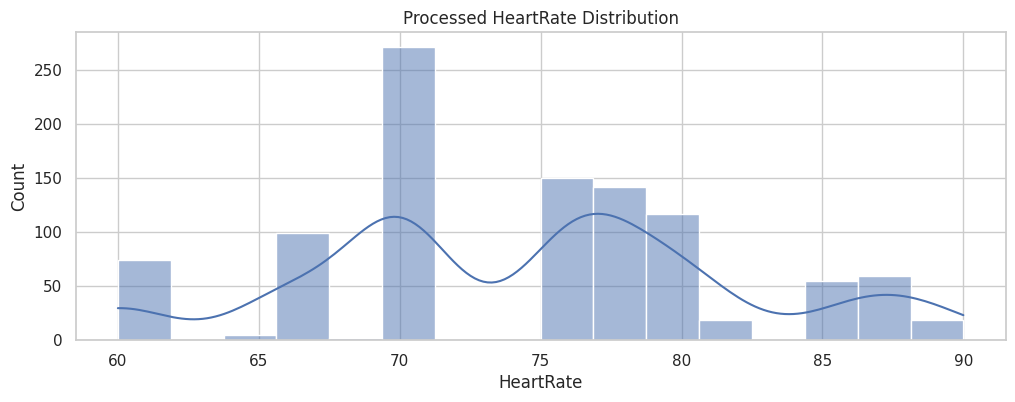

In [ ]:
#Removing rows where HeartRate == 7
data_proc = data.drop(data.index[data.HeartRate == 7])

plt.figure(figsize=(12, 4))
#plotting histogram for processed HeartRate
sns.histplot(data=data_proc, x="HeartRate", kde=True)
plt.title("Processed HeartRate Distribution")
plt.show()

* Removing Irrevelant Features

After conducting analyses of predictor variables,we conclude that the HeartRate variable is less helpful because it has input error in it consisting of irrevelant Bpm values ,so it might be posible that given label is also not correct,and the records may not be valid. all these things can mislead the training process which willl make the model become less accurate.

In [ ]:
#droppping the HeartRate column
data=data.drop(["HeartRate"],axis=1)

## **MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split

* Splitting Dataset

We will split our dataset into 80% train data and 20% test data.

In [ ]:
#splitting data set into X and y
X = data.drop('RiskLevel',axis=1)
y = data['RiskLevel']

In [ ]:
X

,ï»¿Age,SystolicBP,DiastolicBP,BS,BodyTemp
0,25,130,80,15.0,98.0
1,35,140,90,13.0,98.0
2,29,90,70,8.0,100.0
3,30,140,85,7.0,98.0
4,35,120,60,6.1,98.0
...,...,...,...,...,...
1009,22,120,60,15.0,98.0
1010,55,120,90,18.0,98.0
1011,35,85,60,19.0,98.0
1012,43,120,90,18.0,98.0


In [ ]:
y

,RiskLevel
0,0
1,0
2,0
3,0
4,1
5,0
6,2
7,0
8,2
9,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## **BUILDING CLASSIFICATION MODEL**

* Support Vector Machine Algorithm

Support Vector Machines (SVMs) are used in machine learning to classify data by finding the best hyperplane that separates different classes.

In [ ]:
#importing packages required for SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
#create SVM classifier with parameters
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
#train svm classifier
svm.fit(X_train, y_train)
#calculate and print accuracy of testing and training data
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))
#make predictions on test data
y_pred = svm.predict(X_test)
print(y_pred)

#create cm to evaluate models performance
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
#generate classification report for testdata
report=classification_report(y_test, svm.predict(X_test))
print("Classification Report:")
#split  report
lines = report.split('\n')
for line in lines:
    print(line)

train accuracy: 0.840620592383639
test accuracy: 0.7278688524590164
[2 0 0 1 2 2 2 2 2 0 0 1 1 0 2 2 0 1 1 2 2 2 2 0 1 2 0 2 1 1 2 0 1 1 1 0 0
 2 1 0 2 2 0 0 1 2 0 2 1 1 1 1 1 2 2 2 0 1 1 1 1 2 2 2 2 0 2 0 2 2 0 0 1 2
 1 0 1 2 0 1 1 1 1 1 2 1 1 2 0 2 2 0 1 0 2 1 1 1 0 2 1 0 1 1 1 2 1 1 1 2 2
 2 1 0 2 1 1 0 1 0 2 1 1 2 0 0 2 1 2 1 1 1 2 2 1 1 0 2 1 2 0 2 0 0 1 1 0 2
 1 2 1 1 2 2 0 2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 0 1 2 2 1 0 2 1 1 1 0 2 1 1 0
 1 0 1 1 2 2 1 2 2 1 0 2 0 1 1 2 2 0 0 2 1 2 0 2 2 0 2 1 1 1 0 2 0 1 1 0 0
 2 2 1 2 2 1 0 1 1 1 2 1 2 2 1 1 2 0 0 1 1 1 2 0 1 1 1 1 0 1 2 1 0 1 1 0 0
 1 1 2 1 1 2 0 2 1 0 2 1 0 1 2 0 1 1 1 1 1 1 0 1 0 2 1 0 1 2 2 1 2 1 1 1 0
 0 1 2 1 0 0 2 0 1]
CM: [[61  6  9]
 [ 4 92 21]
 [ 8 35 69]]
Accuracy: 72.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        76
           1       0.69      0.79      0.74       117
           2       0.70      0.62      0.65       112

    accuracy 

##  **CONCLUSION**

* After performing Analysis on the dataset ,we can conclude that women who have high blood glucose level tend to have high health risks.
* BS also has strong correlation with Age,SystolicBP and Diastolic Bp.
* Age is also important variable,where health risk starts to increases after 25 years of age.
* SystolicBP and DistolicBP have a strong relationship, with correlation value of 0.79.
* Body temprature is not giving much information but most of the women here have 98F ,woen above this temprature tend to have a higher risk.
* About Heart rate is it the lest helpful feature in determining the health risks.

* We use Support Vector Machine Algorithm to find out the best accuracy of the model.

* we used the support vector machine algorithm that gave us 71% of accuracy.

## **PROJECT SUMMARY**

**OBJECTIVE**

Maternal health is a critical aspect of public health,
and timely prediction of maternal health risks can
significantly improve outcomes for both mothers and
infants. This project aims to analyse maternal health
data and build a machine learning model that can
accurately predict the risk of maternal health
complications.


**DATA DESCRIPTION**

 The Dataset consists of 1014 records with 7 attributes.

     * Age: Age in years when a woman is pregnant.
     * SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
     * DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
     * BS: Blood glucose levels is in terms of a molar concentration,
      mmol/L.
     * Body Temprature : Body Temperature of the women.
     * HeartRate: A normal resting heart rate in beats per minute.
     * Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.



**PROBLEM IDENTIFICATION**

 It has been analyzed by several attributes that affect the health of pregnant women. A machine learning model has been created to predict the level of health risk for pregnant women.



**IMPORTING LIBRARIES AND DATASET**

Libraries such as pandas,numpy,matplotlib etc., provide the necessary tools and functions to manipulate,analyze,visualize and model data.


**EXPLORATORY DATA ANALYSIS**

Dataset's information has been checked.

             * 1st few rows of dataset has been displayes.
             * Last few rows of dataset has been displayed.
             * Summary of dataset has been displayed.
             * Dimensions of dataset has been displayed.
             * Null values of dataset has been displayed.
             * Duplicate values has been displayed.
             * Statistical summary of dataset has been displayed.
             * No.of distinct values has been displayed.




**UNIVARIATE AND BIVARIATE ANALYSIS**

1.Methods to perform univariate analysis will depend on whether the variable is categorical or numerical.

      * For numerical variable, we would explore its shape of distribution (distribution can either be symmetric or skewed) using histogram and density plots.
      
      * For categorical variables, we would use bar plots to visualize the absolute and proportional frequency distribution.

2.We use correlation coefficients to find out how high is the relationship between two variables. We can also use scatter plot to show the patterns that can be formed using the two variables.

**FEATURE ENGINEERING AND DATA CLEANING**       

Many machine learning algorithms and statistical models require input data to be in numerical form. Categorical data cannot be directly used with these models, so it needs to be transformed into numbers.

**OUTLIER HANDLING**

The only variable that has an outlier with an unreasonable value is HeartRate. Therefore, the 2 records has been dropped since the value doesn't make any sense, and most likely is an input error.


**MODEL BUILDING**

The dataset has been splitted up into 80% train data and 20% test data.

1.Training Set: A subset of the dataset used to train the machine learning model. This set helps the model learn the relationship between features and the target variable.
2.Model: Logistic Regression (or any other classifier), trained on the training set.
2.Evaluation Metrics: Metrics such as accuracy, precision, recall, and F1 score are used to assess the performance of the model on the training data.

**BUILDING CLASSIFICATION MODEL**

                     * Support Vector Machines (SVMs) has been used in machine learning to classify data by finding the best hyperplane that separates different classes.
                     * Evaluation Metrics:
                       Metrics such as accuracy, precision, recall, and F1 score are used to assess the performance of the model on the test and  training data.
                     * The support vector machine algorithm gave us 71% of accuracy.


**CONCLUSION**

The Maternal Heath Risk Prediction project successfully utilized machine learning techniques to predict the risk levels associated with maternal health. By analyzing a comprehensive dataset containing various health indicators and demographic factors, we were able to develop models that
accurately classify the risk of maternal complications.